In [1]:
import sys
sys.path.append('../')
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *

from matplotlib import rc
import matplotlib.pylab as plt


#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from plot_chain import plot_single, plot_triple #, plot_distributions, plot_summary_bar
path = '/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/'
ibanez_chains = np.genfromtxt(path+'like/like_mcmc_ibanez_xionly_b_monopole_sam120000')[300:,:-1]
cmass_chains = np.genfromtxt(path+'like/like_mcmc_cmass_w_fkp_xionly_b_monopole_sam120000')[500:,:-1]
cmass_zcut_chains = np.genfromtxt(path+'like/like_mcmc_cmass_zcut_w_fkp_xionly_b_monopole_sam120000')[500:,:-1]
#dmass_chains = np.genfromtxt(path+'like/like_dmass_spt_bias_sam120000')[30000:,:-2]
#dmass_chains_cmasscov = np.genfromtxt(path+'like/like_dmass_spt_bias_cmasscov_sam120000')[30000:,:-2]
#print 'sample size', cmass_chains.shape, dmass_chains.shape
params = ['bias']
truth = [1.0]
figname = 'figure/like_test.png'
chain_names = ['cmass', 'cmass zcut', 'ibanez et al.']
#plot_triple([cmass_chains, cmass_chains], 
#            [params, params], 
#            None, figname, chain_names = chain_names)

#plot_single(dmass_chains, params, truth, figname)

In [53]:
cosmosis_dir = '../'#/cosmology_chuang/matter_power_nl/'
redshift = np.genfromtxt(cosmosis_dir+'cosmology_chuang//matter_power_lin/z.txt')
Pm = np.genfromtxt(cosmosis_dir+'cosmology_chuang/matter_power_lin/p_k.txt')
kk = np.genfromtxt(cosmosis_dir+'cosmology_chuang/matter_power_lin/k_h.txt')
Pm059 = Pm[59, :]

savedir = '/n/des/lee.5922/Dropbox/repositories/CMASS/code/cosmology_chuang/'
DAT = np.column_stack((kk, Pm059 ))
np.savetxt(savedir+'Chuang_cosmology_Pm_lin_z059.txt', DAT, header = 'Chuang cosmology\n# k/h, Pm(k) linear')

In [54]:
cosmosis_dir = '../'#/cosmology_chuang/matter_power_nl/'
redshift = np.genfromtxt(cosmosis_dir+'cosmology_chuang//matter_power_nl/z.txt')
Pm = np.genfromtxt(cosmosis_dir+'cosmology_chuang/matter_power_nl/p_k.txt')
kk = np.genfromtxt(cosmosis_dir+'cosmology_chuang/matter_power_nl/k_h.txt')
Pm059 = Pm[59, :]

savedir = '/n/des/lee.5922/Dropbox/repositories/CMASS/code/cosmology_chuang/'
DAT = np.column_stack((kk, Pm059 ))
np.savetxt(savedir+'Chuang_cosmology_Pm_nl_z059.txt', DAT, header = 'Chuang cosmology\n# k/h, Pm(k) linear')

In [55]:
kk, Pm059 = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/CMASS/code/cosmology_chuang/Chuang_cosmology_Pm_lin_z059.txt', unpack=True)
kk_nl, Pm059_nl = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/CMASS/code/cosmology_chuang/Chuang_cosmology_Pm_nl_z059.txt', unpack=True)

In [56]:
Pm059_old.shape

(815,)

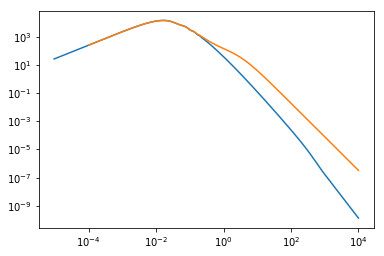

In [57]:
fig, ax = plt.subplots()
ax.loglog(kk, Pm059)
ax.loglog(kk_nl, Pm059_nl)

(-3, 1)

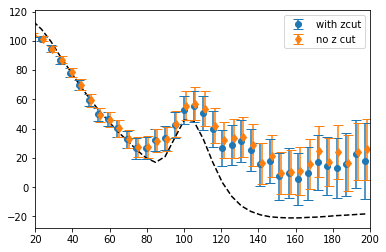

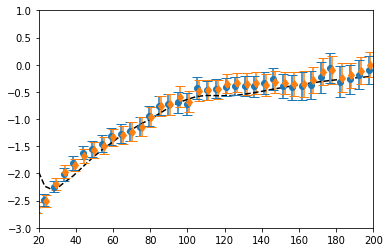

In [137]:
DAT_measurement = np.genfromtxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_monopole_z43z75.dat')
r_measurement = DAT_measurement[:,0]
xi_mono_measu = DAT_measurement[:,1]

meanr, xi_cmass, xi_err, xi_cmass_quad, xi_err_quad = \
np.genfromtxt('../data_txt/full_cmass_zcut_ran10_jk100/cfz_multipole.txt', unpack=True)
#meanr, xi_cmass, xi_err, xi_cmass_quad, xi_err_quad = cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2]

meanr2, xi_cmass2, xi_err2, xi_cmass2_quad, xi_err2_quad = \
np.genfromtxt('../data_txt/full_cmass_ran10_jk100/cfz_multipole.txt', unpack=True)
#meanr2, xi_cmass2, xi_err2, xi_cmass2_quad, xi_err2_quad = cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2]

meanr3, xi_cmass3, xi_cmass3_quad, = \
np.genfromtxt('../data_txt/full_cmass_single/cfz_multipole_single.txt', unpack=True)
#meanr2, xi_cmass2, xi_err2, xi_cmass2_quad, xi_err2_quad = cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2]




theory_corr = np.genfromtxt('../../../bandpower/SNR/data_txt/datav/mcmc_Ashley_xionly_b_p0.datavector')[1500:1500+42]
theory_rr = np.linspace(32, 200, 43)[:-1] + 2.5

rr, xi0, xi2, xi4 = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/output/test_mcmc_P_lin//Xi.txt', unpack=True)
rr2, xi02, xi22, xi42 = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/output/test_mcmc_P_nl///Xi.txt', unpack=True)


fig, ax = plt.subplots()

#ax.plot(r_measurement, r_measurement**2*xi_mono_measu, label='Ibanez')
#ax.plot(rr, rr**2*xi0, label='theory', color='k')
ax.plot(rr, rr**2*xi0, ls = '--', color='k')
#ax.plot(rr2, rr2**2*xi02, label='theory_nl', color='k')
ax.errorbar(meanr, meanr**2*xi_cmass, yerr = meanr**2*xi_err, capsize=5, fmt = 'o', label='with zcut')
ax.errorbar(meanr2+1, meanr2**2*xi_cmass2, yerr = meanr2**2*xi_err2, capsize=5, fmt = 'd',label='no z cut')
#ax.plot(meanr3, meanr3**2*xi_cmass3, label='full')
ax.set_xlim(20, 200)
ax.legend()


fig, ax = plt.subplots()
ax.plot(rr, rr**1*xi2, label='theory', ls = '--', color='k')
#ax.plot(rr2, rr2**2*xi22, label='theory_nl', color='k', ls = '-')
ax.errorbar(meanr, meanr**1*xi_cmass_quad, yerr = meanr**1*xi_err_quad, capsize=5, fmt = 'o',label='with zcut')
ax.errorbar(meanr2+1, meanr2**1*xi_cmass2_quad, yerr = meanr2**1*xi_err2_quad, capsize=5, fmt = 'd',label='no z cut')
ax.set_xlim(20, 200)
ax.set_ylim(-3, 1)

In [ ]:
../data_txt/full_cmass_small_ran10_jk100/

(0, 40)

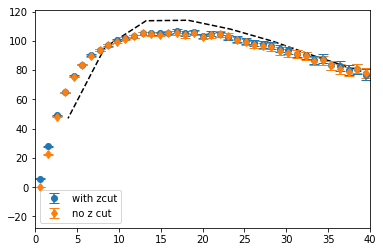

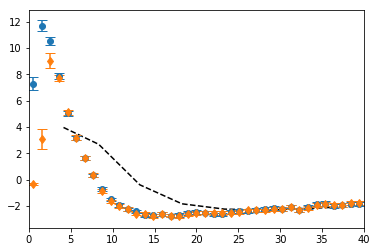

In [12]:
DAT_measurement = np.genfromtxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_monopole_z43z75.dat')
r_measurement = DAT_measurement[:,0]
xi_mono_measu = DAT_measurement[:,1]

meanr, xi_cmass, xi_err, xi_cmass_quad, xi_err_quad = \
np.genfromtxt('../data_txt/full_cmass_zcut_small_ran10_jk100/cfz_multipole.txt', unpack=True)
#meanr, xi_cmass, xi_err, xi_cmass_quad, xi_err_quad = cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2]

meanr2, xi_cmass2, xi_err2, xi_cmass2_quad, xi_err2_quad = \
np.genfromtxt('../data_txt/full_cmass_small_ran10_jk100/cfz_multipole.txt', unpack=True)
#meanr2, xi_cmass2, xi_err2, xi_cmass2_quad, xi_err2_quad = cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2]

meanr3, xi_cmass3, xi_cmass3_quad, = \
np.genfromtxt('../data_txt/full_cmass_single/cfz_multipole_single.txt', unpack=True)
#meanr2, xi_cmass2, xi_err2, xi_cmass2_quad, xi_err2_quad = cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2]




theory_corr = np.genfromtxt('../../../bandpower/SNR/data_txt/datav/mcmc_Ashley_xionly_b_p0.datavector')[1500:1500+42]
theory_rr = np.linspace(32, 200, 43)[:-1] + 2.5

rr, xi0, xi2, xi4 = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/output/test_mcmc_P_lin//Xi.txt', unpack=True)
rr2, xi02, xi22, xi42 = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/output/test_mcmc_P_nl///Xi.txt', unpack=True)


fig, ax = plt.subplots()

#ax.plot(r_measurement, r_measurement**2*xi_mono_measu, label='Ibanez')
#ax.plot(rr, rr**2*xi0, label='theory', color='k')
ax.plot(rr, rr**2*xi0, ls = '--', color='k')
#ax.plot(rr2, rr2**2*xi02, label='theory_nl', color='k')
ax.errorbar(meanr, meanr**2*xi_cmass, yerr = meanr**2*xi_err, capsize=5, fmt = 'o', label='with zcut')
ax.errorbar(meanr2, meanr2**2*xi_cmass2, yerr = meanr2**2*xi_err2, capsize=5, fmt = 'd',label='no z cut')
#ax.plot(meanr3, meanr3**2*xi_cmass3, label='full')
ax.set_xlim(0, 40)
ax.legend()


fig, ax = plt.subplots()
ax.plot(rr, rr**1*xi2, label='theory', ls = '--', color='k')
#ax.plot(rr2, rr2**2*xi22, label='theory_nl', color='k', ls = '-')
ax.errorbar(meanr, meanr**1*xi_cmass_quad, yerr = meanr**1*xi_err_quad, capsize=5, fmt = 'o',label='with zcut')
ax.errorbar(meanr2, meanr2**1*xi_cmass2_quad, yerr = meanr2**1*xi_err2_quad, capsize=5, fmt = 'd',label='no z cut')
ax.set_xlim(0, 40)
#ax.set_ylim(-3, 1)

In [13]:
help(plot_triple)

Help on function plot_triple in module plot_chain:

plot_triple(chains, params_names, params_fid, figname, keep=None, extents=None, chain_names=None, plot_hists=True, blind=None, shade_alpha=None, shade=None, colors=None, linestyles=None, linewidths=None, kde=None)
    keep : list. choose in the second chain
    params_fid : fiducial value of chain2



plot save to  test.png


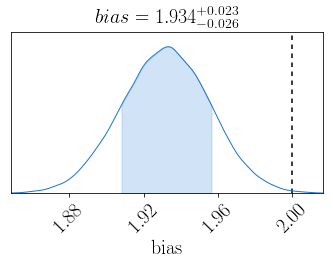

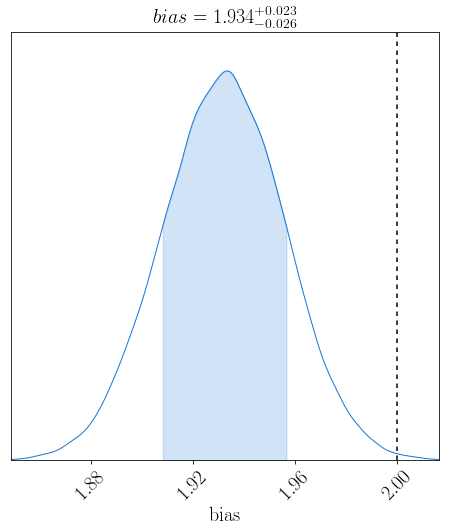

In [19]:
plot_triple([cmass_zcut_chains], [['bias']], [2.0], 'test.png', chain_names = chain_names, \
                  )

plot save to  test.png


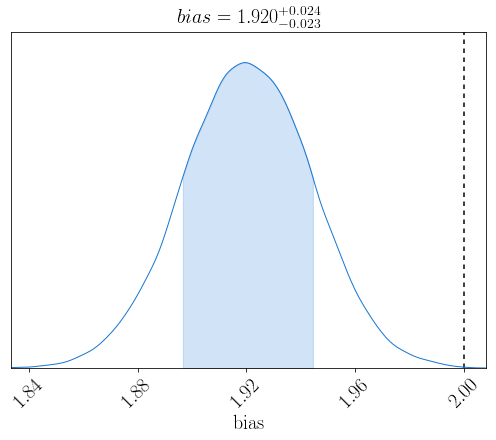

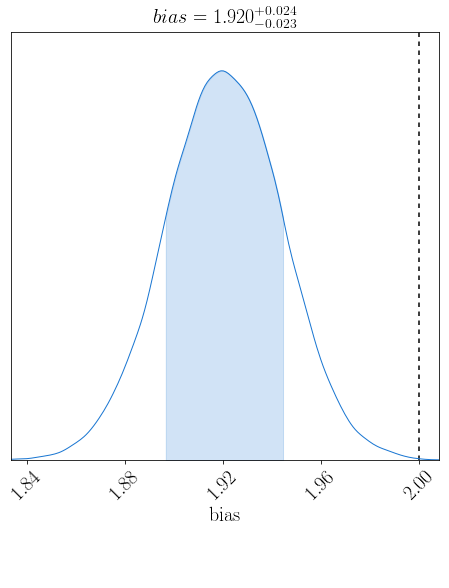

In [18]:
plot_triple([cmass_chains], [['bias']], [2.0], 'test.png', chain_names = chain_names, \
                  )

fig saved to  figure/plot_distributions_cmass.pdf


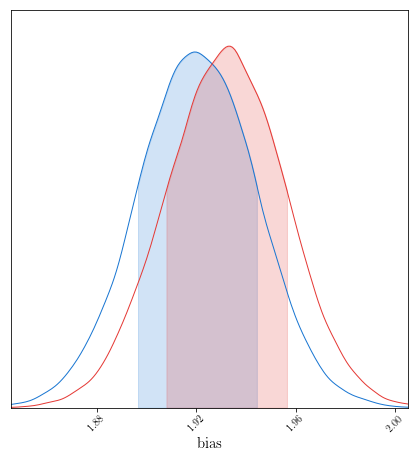

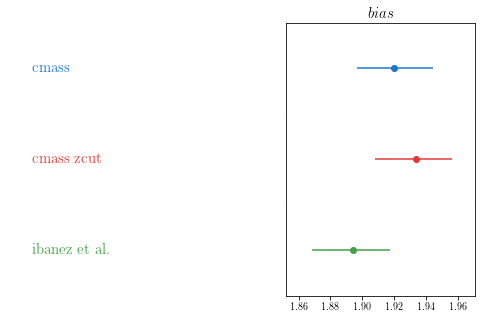

In [32]:
plot_distributions([cmass_chains, cmass_zcut_chains], params, params_truth = None, chain_names = chain_names, \
                  figname = 'figure/plot_distributions_cmass.pdf')
plot_summary_bar([cmass_chains, cmass_zcut_chains, ibanez_chains], params, params_truth=None, chain_names=chain_names)

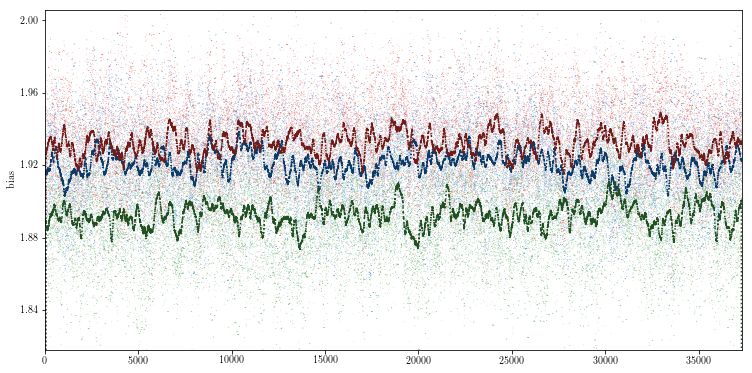

In [31]:
from chainconsumer import ChainConsumer

c = ChainConsumer()
  
c.add_chain(cmass_chains, parameters=params, name='cmass')
c.add_chain(cmass_zcut_chains, parameters=params, name='cmass zcut')
c.add_chain(ibanez_chains, parameters=params, name='ibanez et al.')
    
#c.configure(label_font_size = 15)
fig = c.plotter.plot_walks(truth={"bias": 1.0}, convolve=100)

#fig = c.plotter.plot_distributions(truth=[1.0])
fig.set_size_inches(4.5 + fig.get_size_inches())   

In [24]:
pk059 = np.genfromtxt('/n/des/lee.5922/programs/CAMB/output/test_planck15_z059_matterpower.dat')
pk = np.genfromtxt('/n/des/lee.5922/programs/CAMB/output/test_planck15_z055_matterpower.dat')
pkAs26 = np.genfromtxt('/n/des/lee.5922/programs/CAMB/output/test_planck15_z055_As2.6_matterpower.dat')

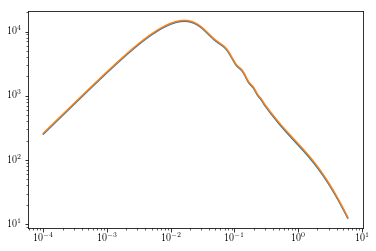

In [26]:
fig, ax = plt.subplots()
ax.loglog(pk[:,0], pk[:,1])
#ax.loglog(pk059[:,0], pk059[:,1])
ax.loglog(pkAs26[:,0], pkAs26[:,1])


In [35]:
theory_rr2

array([  42.5,   47.5,   52.5,   57.5,   62.5,   67.5,   72.5,   77.5,
         82.5,   87.5,   92.5,   97.5,  102.5,  107.5,  112.5,  117.5,
        122.5,  127.5,  132.5,  137.5,  142.5,  147.5,  152.5,  157.5,
        162.5,  167.5,  172.5,  177.5])

In [175]:
theory_corr1

array([ -5.04710936e-04,  -5.36173544e-04,  -5.69243742e-04,
        -6.00404966e-04,  -6.35035746e-04,  -6.75449099e-04,
        -7.14743813e-04,  -7.50736810e-04,  -7.89246893e-04,
        -8.27891500e-04,  -8.56106497e-04,  -8.72790373e-04,
        -8.79075760e-04,  -8.59360423e-04,  -7.92530378e-04,
        -6.65343833e-04,  -4.51465096e-04,  -9.79414184e-05,
         4.48596453e-04,   1.22490294e-03,   2.24721253e-03,
         3.44105555e-03,   4.53471518e-03,   5.09759766e-03,
         4.83171932e-03,   3.92514936e-03,   3.00689001e-03,
         2.63862197e-03,   2.95447260e-03,   3.78400890e-03,
         4.93630622e-03,   6.36490708e-03,   8.14603246e-03,
         1.03604767e-02,   1.31141591e-02,   1.66401146e-02,
         2.12549052e-02,   2.72925247e-02,   3.52720726e-02,
         4.61154741e-02,   6.11224490e-02,   8.21671814e-02])

In [174]:
theory_corr2

array([  4.93735630e-05,   1.25921863e-04,   4.42696761e-04,
         4.87208317e-04,   6.43610022e-04,   3.05791810e-04,
         7.76189524e-04,   9.30504394e-04,   1.16024722e-03,
         2.21931013e-03,   9.08840618e-04,   1.56508382e-03,
         2.04922342e-03,   3.18015754e-03,   3.55442852e-03,
         4.69316498e-03,   4.46878470e-03,   5.19613746e-03,
         5.43028384e-03,   5.73725280e-03,   6.58216451e-03,
         8.44231087e-03,   9.86934936e-03,   1.33165188e-02,
         1.69833219e-02,   2.01588161e-02,   2.93699704e-02,
         4.28588280e-02])

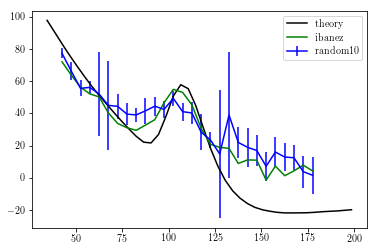

In [184]:
theory_corr1 = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_Ashley_xionly_b_p0.datavector')[1500:1500+42]
#theory_corr2 = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_Ashley_xionly_b_p0.datavector')[1500+42:1500+42+42]
theory_rr = np.linspace(32, 200, 43)[:-1] + 2.5

theory_corr2 = np.genfromtxt('../../bandpower/SNR/data_txt/datav/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_z43z75_reverse.datavector')[1500:1500+28]
#theory_corr2 = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_cmass_zcut_xionly_b_monopole.datavector')[1500:1500+28]
theory_rr2 = np.linspace(40, 180, 29)[:-1] + 2.5


fig, ax = plt.subplots()

ax.plot(theory_rr[::-1], theory_rr[::-1]**2*theory_corr1, 'k-', label = 'theory')
ax.plot(theory_rr2[::-1], theory_rr2[::-1]**2*theory_corr2, 'g-', label = 'ibanez')
#ax.plot(r_measurement, r_measurement**2*xi_mono_measu, 'k.', label = 'Ibanez')
#ax.plot(meanr, meanr**2*xi0_cmass, 'c.', label = 'random10')
ax.errorbar(meanr, meanr**2*xi0_cmass_jk, yerr = meanr**2*err_xi0_cmass, color ='b', fmt='-' , label = 'random10')
#ax.plot(meanr_zcut, meanr_zcut**2*xi0_cmass_zcut, 'r.', label = 'random10, zcut')
#ax.errorbar(meanr_zcut*1.1, meanr_zcut**2*xi0_cmass_zcut_jk, yerr = meanr_zcut**2*err_xi0_cmass_zcut, color ='r', fmt='-' , label = 'random10, zcut')
ax.legend()

In [29]:
theory_corr1.shape, theory_corr2.shape

((42,), (42,))

In [45]:
theory_corr1.shape, ibanez.shape, theory_corr2.shape

((1626,), (1626,), (1584,))

In [3]:
#theory_corr1 = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_Ashley_xionly_b_p0.datavector')#[1500:1500+42]
#theory_corr2 = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_Ashley_xionly_b_p0.datavector')[1500+42:1500+42+42]
#theory_rr = np.linspace(32, 200, 43)[:-1] + 2.5



mask = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_ibanez_xionly_b_monopole.mask')

theory_corr2 = np.genfromtxt('../../bandpower/SNR/data_txt/datav/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_z43z75.datavector')[1500:1500+28]
ibanez = np.zeros(mask.shape)

ibanez[1500:1500+28] = theory_corr2[::-1]
np.savetxt('../../bandpower/SNR/data_txt/datav/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_z43z75_reverse.datavector', ibanez)


def making_data_vector( mask = None, data = None, kN = None, output_root = None ):
       
    #mask = np.zeros(mask)
    #data = np.zeros(data)
    rN = data.size
    
    data_vector = np.zeros(mask.shape)
    data_vector[kN*3:kN*3+rN] = data[::-1]
    
    np.savetxt(output_root, data_vector)
    print 'datavector saved to ',output_root

###########################   
mask = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_cmass_xionly_b_monopole.mask')
cmass_corr = np.genfromtxt('data_txt/cfz_multipole_comparison_cmass_ngc_sgc_weight_random10_njack10.txt')
meanr, xi0_cmass_jk, xi2_cmass_jk, err_xi0_cmass, err_xi2_cmass  \
= cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2], cmass_corr[:,3],cmass_corr[:,4]

data = xi0_cmass_jk#np.hstack([xi0_cmass_jk,xi2_cmass_jk])
kN = 500
output_root = '../../bandpower/SNR/data_txt/datav/mcmc_cmass_xionly_b_monopole.datavector'
making_data_vector( mask = mask, data = data, kN = kN, output_root = output_root )

###########################
cmass_corr = np.genfromtxt('data_txt/cfz_multipole_comparison_cmass_ngc_sgc_weight_fkp_random10_njack10.txt')
meanr, xi0_cmass_jk, xi2_cmass_jk, err_xi0_cmass, err_xi2_cmass  \
= cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2], cmass_corr[:,3],cmass_corr[:,4]

data = xi0_cmass_jk#np.hstack([xi0_cmass_jk,xi2_cmass_jk])
kN = 500
output_root = '../../bandpower/SNR/data_txt/datav/mcmc_cmass_w_fkp_xionly_b_monopole.datavector'
making_data_vector( mask = mask, data = data, kN = kN, output_root = output_root )

###########################
cmass_corr = np.genfromtxt('data_txt/cfz_multipole_comparison_cmass_ngc_sgc_zcut_weight_fkp_random10_njack10.txt')
meanr, xi0_cmass_jk, xi2_cmass_jk, err_xi0_cmass, err_xi2_cmass  \
= cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2], cmass_corr[:,3],cmass_corr[:,4]

data = xi0_cmass_jk#np.hstack([xi0_cmass_jk,xi2_cmass_jk])
kN = 500
output_root = '../../bandpower/SNR/data_txt/datav/mcmc_cmass_zcut_w_fkp_xionly_b_monopole.datavector'
making_data_vector( mask = mask, data = data, kN = kN, output_root = output_root )

datavector saved to  ../../bandpower/SNR/data_txt/datav/mcmc_cmass_xionly_b_monopole.datavector
datavector saved to  ../../bandpower/SNR/data_txt/datav/mcmc_cmass_w_fkp_xionly_b_monopole.datavector
datavector saved to  ../../bandpower/SNR/data_txt/datav/mcmc_cmass_zcut_w_fkp_xionly_b_monopole.datavector


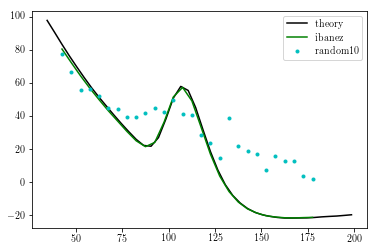

In [192]:
mask = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_cmass_xionly_b_monopole.mask')
cmass_corr = np.genfromtxt('data_txt/cfz_multipole_comparison_cmass_ngc_sgc_zcut_weight_random10_njack10.txt')
meanr, xi0_cmass_jk, xi2_cmass_jk, err_xi0_cmass, err_xi2_cmass  \
= cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2], cmass_corr[:,3],cmass_corr[:,4]

theory_corr1 = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_Ashley_xionly_b_p0.datavector')[1500:1500+42]
#theory_corr2 = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_Ashley_xionly_b_p0.datavector')[1500+42:1500+42+42]
theory_rr = np.linspace(32, 200, 43)[:-1] + 2.5


theory_corr2 = np.genfromtxt('../../bandpower/SNR/data_txt/datav/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_z43z75_reverse.datavector')[1500:1500+28]
theory_corr2 = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_Ashley_xionly_b_p0_z059.datavector')[1500:1500+28]
theory_rr2 = np.linspace(40, 180, 29)[:-1] + 2.5


fig, ax = plt.subplots()

ax.plot(theory_rr[::-1], theory_rr[::-1]**2*theory_corr1, 'k-', label = 'theory')
ax.plot(theory_rr2[::-1], theory_rr2[::-1]**2*theory_corr2, 'g-', label = 'ibanez')
#ax.plot(r_measurement, r_measurement**2*xi_mono_measu, 'k.', label = 'Ibanez')
ax.plot(meanr, meanr**2*xi0_cmass_jk, 'c.', label = 'random10')
#ax.errorbar(meanr, meanr**2*xi0_cmass_jk, yerr = meanr**2*err_xi0_cmass, color ='b', fmt='-' , label = 'random10')
#ax.plot(meanr_zcut, meanr_zcut**2*xi0_cmass_zcut, 'r.', label = 'random10, zcut')
#ax.errorbar(meanr_zcut*1.1, meanr_zcut**2*xi0_cmass_zcut_jk, yerr = meanr_zcut**2*err_xi0_cmass_zcut, color ='r', fmt='-' , label = 'random10, zcut')
ax.legend()

In [191]:
theory_corr2

array([ -5.04710936e-04,  -5.36173544e-04,  -5.69243742e-04,
        -6.00404966e-04,  -6.35035746e-04,  -6.75449099e-04,
        -7.14743813e-04,  -7.50736810e-04,  -7.89246893e-04,
        -8.27891500e-04,  -8.56106497e-04,  -8.72790373e-04,
        -8.79075760e-04,  -8.59360423e-04,  -7.92530378e-04,
        -6.65343833e-04,  -4.51465096e-04,  -9.79414184e-05,
         4.48596453e-04,   1.22490294e-03,   2.24721253e-03,
         3.44105555e-03,   4.53471518e-03,   5.09759766e-03,
         4.83171932e-03,   3.92514936e-03,   3.00689001e-03,
         2.63862197e-03])